In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from qutip import Bloch, Qobj, basis, mesolve, sigmam, sigmap, sigmax

%matplotlib inline

# Figure 1

In [6]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
# omega_d = ?  # drive frequency
# omega_q = ?  # transition frequency between |e> and |f> levels
# J = gamma_e / 4  # coupling strength?
# Delta = 0  # detuning

In [7]:
J_list = np.linspace(0, 8, num=100)
Delta_list = np.linspace(-4, 4, num=100)
J_grid, Delta_grid = np.meshgrid(J_list, Delta_list)
dlambda_grid = np.zeros(J_grid.shape, dtype=complex)

for J_idx, J in enumerate(J_list):
    for Delta_idx, Delta in enumerate(Delta_list):
        Delta *= 2 * np.pi
        
        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        lambda_m, lambda_p = H_eff.eigenenergies()
        dlambda = lambda_p - lambda_m
        dlambda_grid[Delta_idx, J_idx] = dlambda

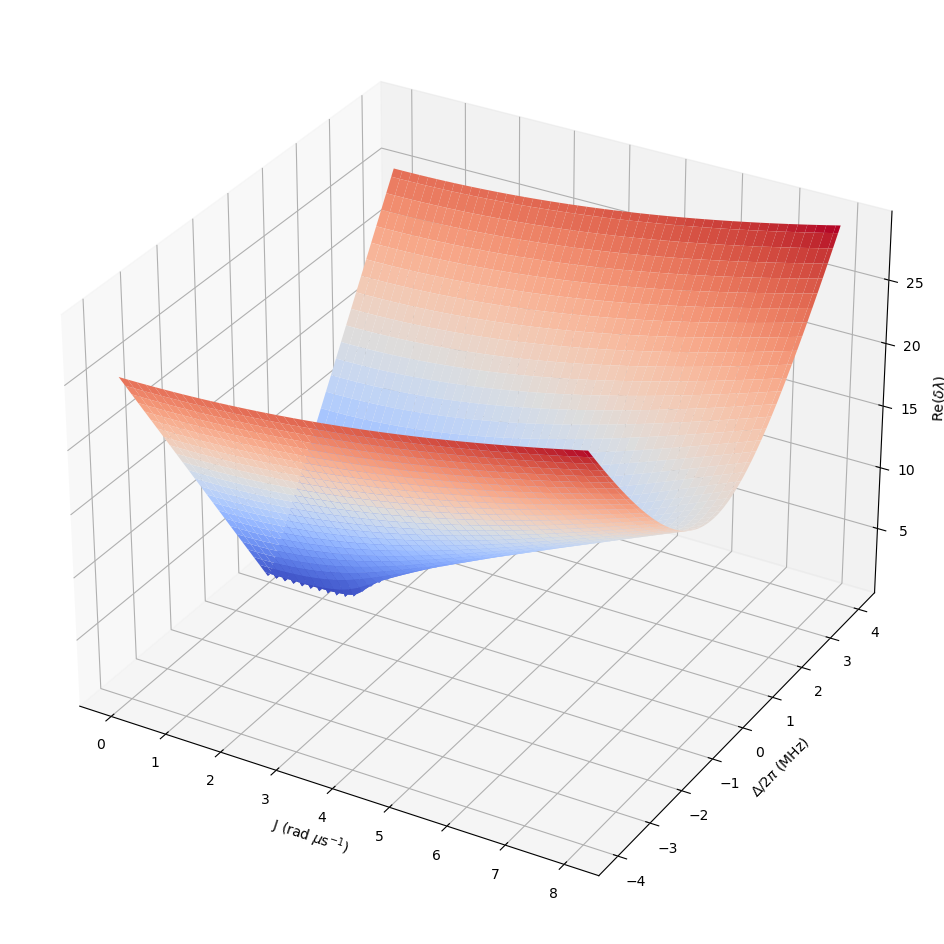

In [8]:
### Figure 1c ###

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "3d"})

surf = ax.plot_surface(J_grid, Delta_grid, dlambda_grid.real, cmap=cm.coolwarm)
ax.set_xlabel('J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel('$\Delta / 2\pi$ (MHz)')
ax.set_zlabel('Re($\delta\lambda$)');

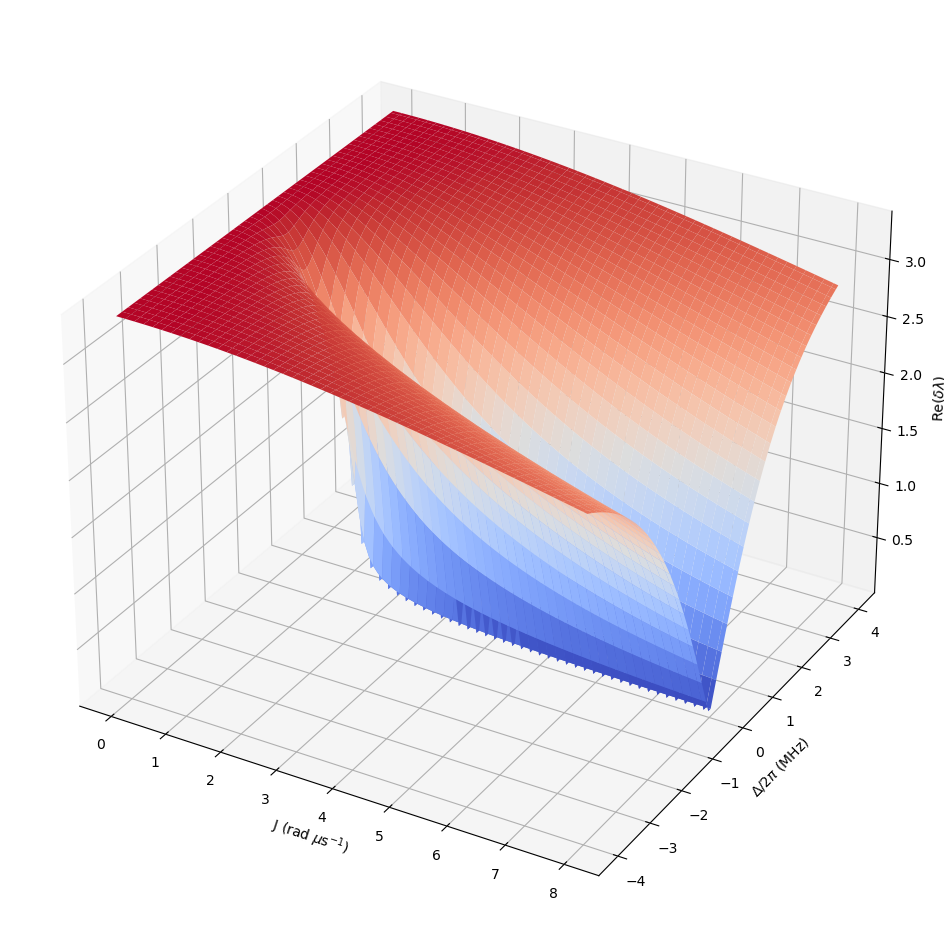

In [9]:
### Figure 1d ###

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "3d"})

surf = ax.plot_surface(J_grid, Delta_grid, np.abs(dlambda_grid.imag), cmap=cm.coolwarm)
ax.set_xlabel('J (rad $\mu\mathrm{s}^{-1}$)')
ax.set_ylabel('$\Delta / 2\pi$ (MHz)')
ax.set_zlabel('Re($\delta\lambda$)');

# Figure 2

In [3]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning

In [4]:
J_list = np.linspace(0, 20, num=100)[1:]
t_list = np.linspace(0, 2, num=100)
t_grid, J_grid = np.meshgrid(t_list, J_list)
Pfn_grid = np.zeros_like(J_grid)

psi0 = basis(2, 1)  # initialize in |f>

for J_idx, J in enumerate(J_list):
    # effective Hamiltonian
    H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])
    
    out = mesolve(H_eff, psi0, t_list, e_ops=[sigmap() * sigmam()])
    Pfn_grid[J_idx, :] = 1 - out.expect[0]

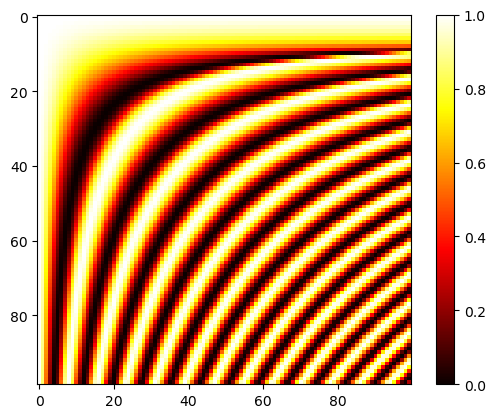

In [5]:
### Figure 2a ###

plt.imshow(Pfn_grid, cmap='hot', interpolation='nearest')
plt.colorbar()

# Figure 3

In [6]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning
phi = np.pi / 2

In [7]:
J_list = np.linspace(0, gamma_e / 4, num=45)
theta_list = np.linspace(np.pi, 0, num=70)
t_list = np.linspace(0, 0.5, num=2)
theta_grid, J_grid = np.meshgrid(theta_list, J_list)
dPfn_grid = np.zeros_like(J_grid)

for J_idx, J in enumerate(J_list):
    for theta_idx, theta in enumerate(theta_list):
        # initialize with polar angle theta, in the Y-Z plane
        psi0 = np.cos(theta / 2) * basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)

        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        out = mesolve(H_eff, psi0, t_list, e_ops=[sigmap() * sigmam()])
        dPfn_grid[J_idx, theta_idx] = (1 - out.expect[0][0]) - (1 - out.expect[0][-1])

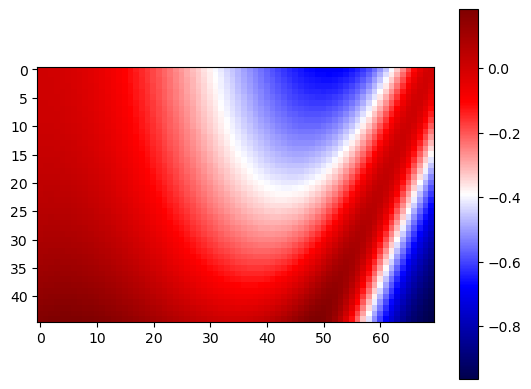

In [8]:
### Figure 3a ###

plt.imshow(dPfn_grid, cmap='seismic', interpolation='nearest')
plt.colorbar()

In [9]:
# constants
gamma_e = 6.7  # occupation-number loss rate to |g>
gamma_f = 0.25  # decay rate to |e>
Delta = 0  # detuning
theta = np.pi / 2

In [10]:
J_list = np.linspace(0, 5, num=45)
phi_list = np.linspace(0, 2 * np.pi, num=70)
t_list = np.linspace(0, 0.5, num=2)
phi_grid, J_grid = np.meshgrid(phi_list, J_list)
dPfn_grid = np.zeros_like(J_grid)

for J_idx, J in enumerate(J_list):
    for phi_idx, phi in enumerate(phi_list):
        # initialize with azimuthal angle phi, in the X-Y plane
        psi0 = np.cos(theta / 2) * basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)

        # effective Hamiltonian
        H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])

        out = mesolve(H_eff, psi0, t_list, e_ops=[sigmap() * sigmam()])
        dPfn_grid[J_idx, phi_idx] = (1 - out.expect[0][0]) - (1 - out.expect[0][-1])

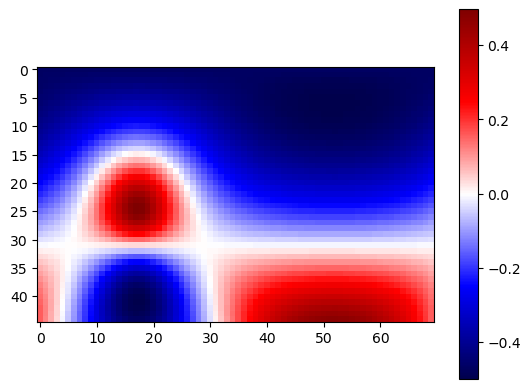

In [11]:
### Figure 3b ###

plt.imshow(dPfn_grid, cmap='seismic', interpolation='nearest')
plt.colorbar()

In [15]:
J = 5
H_eff = J * sigmax() + (Delta - 1j * gamma_e / 2) * Qobj([[1, 0], [0, 0]])
_, (e1, e2) = H_eff.eigenstates()

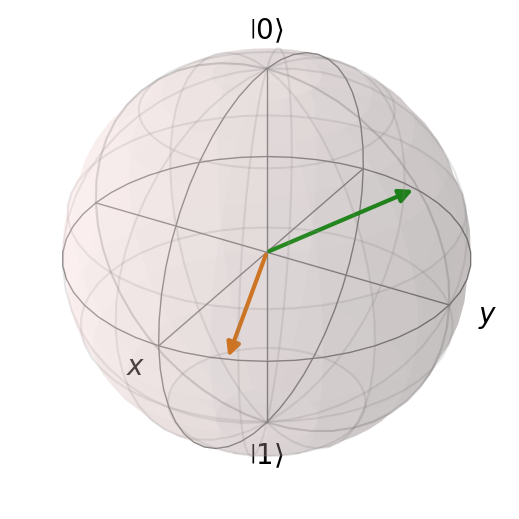

In [16]:
theta = 1/2 * np.pi
phi = 0
psi0 = np.cos(theta / 2) * basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)
b = Bloch()
# b.add_states(psi0)
b.add_states([e1, e2])
b.render()
b.show()